In [21]:
import os
import caselawnet
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import json
import networkx as nx
import community

In [14]:
filepath = '/media/sf_VBox_Shared/CaseLaw/2018-01-29-lido/derived/'
nodes_df = pd.read_csv(os.path.join(filepath, 'article_nodes_nodup_min5.csv'), index_col='id')
edges_df = pd.read_csv(os.path.join(filepath, 'article_to_article_min5.csv'))

In [15]:
nodes_df.head()

,title,label,authority,community,book
id,,,,,
http://linkeddata.overheid.nl/terms/bwb/id/BWBR0001827/10566384/2010-07-01/2010-07-01,Wetboek van Burgerlijke Rechtsvordering (geldt...,Wetboek van Burgerlijke Rechtsvordering (geldt...,Veiligheid en Justitie,2,Wetboek van Burgerlijke Rechtsvordering (geldt...
http://linkeddata.overheid.nl/terms/bwb/id/BWBR0001827/10566384/2013-01-01/2013-01-01,Wetboek van Burgerlijke Rechtsvordering (geldt...,Wetboek van Burgerlijke Rechtsvordering (geldt...,Veiligheid en Justitie,2,Wetboek van Burgerlijke Rechtsvordering (geldt...
http://linkeddata.overheid.nl/terms/bwb/id/BWBR0001827/10566394/2010-07-01/2010-07-01,Wetboek van Burgerlijke Rechtsvordering (geldt...,Wetboek van Burgerlijke Rechtsvordering (geldt...,Veiligheid en Justitie,2,Wetboek van Burgerlijke Rechtsvordering (geldt...
http://linkeddata.overheid.nl/terms/bwb/id/BWBR0001827/10566404/2010-07-01/2010-07-01,Wetboek van Burgerlijke Rechtsvordering (geldt...,Wetboek van Burgerlijke Rechtsvordering (geldt...,Veiligheid en Justitie,2,Wetboek van Burgerlijke Rechtsvordering (geldt...
http://linkeddata.overheid.nl/terms/bwb/id/BWBR0001827/10566414/2010-07-01/2010-07-01,Wetboek van Burgerlijke Rechtsvordering (geldt...,Wetboek van Burgerlijke Rechtsvordering (geldt...,Veiligheid en Justitie,2,Wetboek van Burgerlijke Rechtsvordering (geldt...


In [16]:
graph = nx.from_pandas_edgelist(edges_df, source='source', target='target', edge_attr='weight')
attributes = ['title', 'authority', 'book', 'community']
for att in attributes:
    nx.set_node_attributes(graph, nodes_df[att].to_dict(), att)

## Assortativity

In [24]:
for att in attributes[1:]:
    ass = nx.attribute_assortativity_coefficient(graph, att)
    mod = community.modularity(nodes_df[att].to_dict(), graph)
    print(att, 'assortativity:', ass, 'modularity:', mod)

authority assortativity: 0.44028534616659437 modularity: 0.22271713532865095
book assortativity: 0.35516644114956414 modularity: 0.409178002901182
community assortativity: 0.7246170303282646 modularity: 0.5803499438513066


## Degree distributions

In [25]:
degree_hist = nx.degree_histogram(graph)

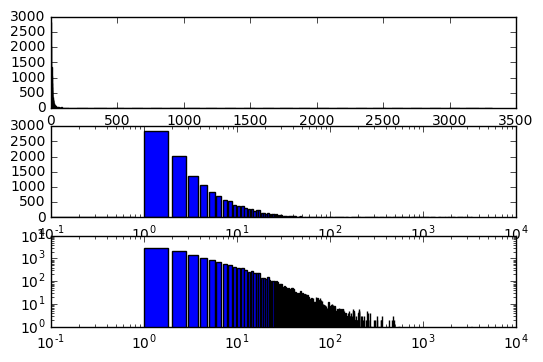

In [26]:
ax = plt.subplot(311)
ax.bar(range(len(degree_hist)), degree_hist);

ax = plt.subplot(312)
ax.bar(range(len(degree_hist)), degree_hist);
ax.set_xscale("log", nonposx='clip')


ax = plt.subplot(313)
ax.bar(range(len(degree_hist)), degree_hist);
ax.set_xscale("log")
ax.set_yscale("log")

## Connected components

In [27]:
import numpy as np

In [30]:
ccs = list(nx.connected_components(graph))

In [31]:
ccs_multiple = [c for c in ccs if len(c) > 1]
ccs_sizes = np.array([len(c) for c in ccs])
ccs_multiple_sizes = np.array([len(c) for c in ccs_multiple])
print("Number of connected components:", len(ccs))
print("Relative size of largest component:", np.max(ccs_sizes)/np.sum(ccs_sizes))
print("Number of non-singleton components:", len(ccs_multiple_sizes))
print("Relative size of largest component without singletons:", np.max(ccs_multiple_sizes)/np.sum(ccs_multiple_sizes))

Number of connected components: 285
Relative size of largest component: 0.954420579421
Number of non-singleton components: 285
Relative size of largest component without singletons: 0.954420579421


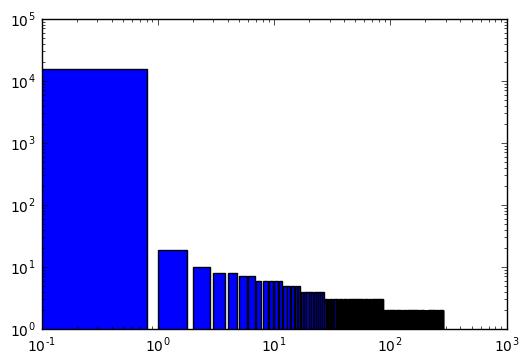

In [32]:
plt.bar(range(len(ccs)), sorted(ccs_sizes, reverse=True))
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')

In [50]:
# Save largest cc
gcc_ids = list(ccs[np.argmax(ccs_sizes)])
nodes_gcc = nodes_df.loc[gcc_ids]
edges_gcc = edges_df[edges_df['source'].isin(gcc_ids) & edges_df['target'].isin(gcc_ids)]
print(len(nodes_gcc), len(edges_gcc))
nodes_gcc.to_csv(os.path.join(filepath, 'article_nodes_nodup_min5_gcc.csv'))
edges_gcc.to_csv(os.path.join(filepath, 'article_to_article_min5_gcc.csv'), index=False)

15286 154703


## communities

In [37]:
community_sizes = nodes_df.groupby('community').size()
print("Number of communities:", len(community_sizes))
print("Average size of community", community_sizes.mean())

Number of communities: 398
Average size of community 40.2412060302
